In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [37]:
import numpy as np

In [2]:
device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [24]:
device

device(type='cuda')

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root = './data', train=True, 
                                        transform = transforms.ToTensor(),
                                        download = True)

test_dataset = torchvision.datasets.FashionMNIST(root = './data', train=False, 
                                        transform = transforms.ToTensor(),
                                        download = True)

In [4]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 64,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 64,
                                           shuffle = False)

In [5]:
example = iter(train_loader)

In [6]:
samples, labels = next(example)
print(samples.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


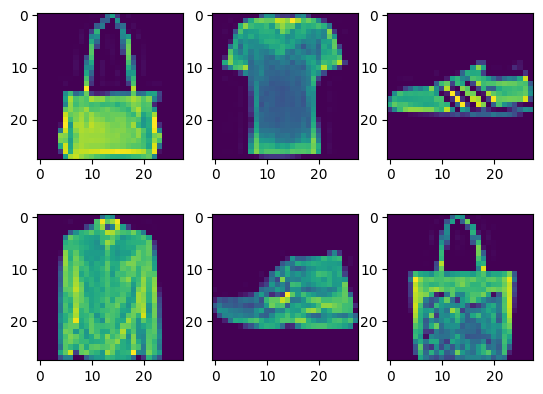

In [7]:
for i in range(6):

  plt.subplot(2, 3, i+1)
  plt.imshow(samples[i][0])


In [8]:
class NeuralNet(nn.Module):

  def __init__(self):
        
    super().__init__()

    self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 10),
        )

  def forward(self, x):

    out = self.linear_relu_stack(x)

    return out

In [9]:
class NeuralNet2(nn.Module):

  def __init__(self):
        
    super().__init__()

    self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 203),
            nn.ReLU(),
            nn.Linear(203, 203),
            nn.ReLU(),
            nn.Linear(203, 10),
        )

  def forward(self, x):

    out = self.linear_relu_stack(x)

    return out

In [10]:
class NeuralNet3(nn.Module):

  def __init__(self):
        
    super().__init__()

    self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 176),
            nn.ReLU(),
            nn.Linear(176, 176),
            nn.ReLU(),
            nn.Linear(176, 176),
            nn.ReLU(),
            nn.Linear(176, 10),
        )

  def forward(self, x):

    out = self.linear_relu_stack(x)

    return out

In [11]:
# Testing Models for various learning rates

In [26]:
criterion = nn.CrossEntropyLoss()

In [27]:
n_total_steps = len(train_loader)

In [38]:
num_epochs = 20

In [42]:
def train(model, learning_rate, losses_ep):

  optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

  for epoch in range(num_epochs):

    losses = []

    for i, (images, labels) in enumerate(train_loader):

      images = images.reshape(-1, 28*28).to(device)

      labels = labels.to(device)

      outputs = model(images)

      loss = criterion(outputs, labels)


      # Backward
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (i+1) % 100 == 0:

        print(f'epoch {epoch+1}/{num_epochs} step {i+1}/{n_total_steps}, loss = {loss}')

      losses.append(loss.item())
    
    losses_ep.append(sum(losses)/len(losses))

  

In [43]:
def test(model):

  with torch.no_grad():

    n_correct = 0
    n_samples = 0

    for images, labels in test_loader:
      
      images = images.reshape(-1, 28*28).to(device)
      labels = labels.to(device)

      outputs = model(images)

      _, predictions = torch.max(outputs, 1)

      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()

    accuracy = 100.0 * n_correct/n_samples

    print(f'accuracy {accuracy}%')

    return accuracy

In [44]:
losses1 = [[], [], [], [], []]
lr = [0.0001, 0.001, 0.01, 0.1, 1]
accuracy = []

for i in range(5):

  model = NeuralNet().to(device)

  print(f'For Learning Rate = {lr[i]}')
  
  train(model, learning_rate = lr[i], losses_ep = losses1[i])

  accuracy.append(test(model))

  print('_______________________________________')

For Learning Rate = 0.0001
epoch 1/20 step 100/938, loss = 2.235750913619995
epoch 1/20 step 200/938, loss = 2.1815435886383057
epoch 1/20 step 300/938, loss = 2.113234281539917
epoch 1/20 step 400/938, loss = 2.10788893699646
epoch 1/20 step 500/938, loss = 2.075662851333618
epoch 1/20 step 600/938, loss = 2.013248920440674
epoch 1/20 step 700/938, loss = 1.9020904302597046
epoch 1/20 step 800/938, loss = 1.8505982160568237
epoch 1/20 step 900/938, loss = 1.8511791229248047
epoch 2/20 step 100/938, loss = 1.7415125370025635
epoch 2/20 step 200/938, loss = 1.7730094194412231
epoch 2/20 step 300/938, loss = 1.7080119848251343
epoch 2/20 step 400/938, loss = 1.6478967666625977
epoch 2/20 step 500/938, loss = 1.5180034637451172
epoch 2/20 step 600/938, loss = 1.5698672533035278
epoch 2/20 step 700/938, loss = 1.472564458847046
epoch 2/20 step 800/938, loss = 1.5107555389404297
epoch 2/20 step 900/938, loss = 1.3322534561157227
epoch 3/20 step 100/938, loss = 1.4462603330612183
epoch 3/20 

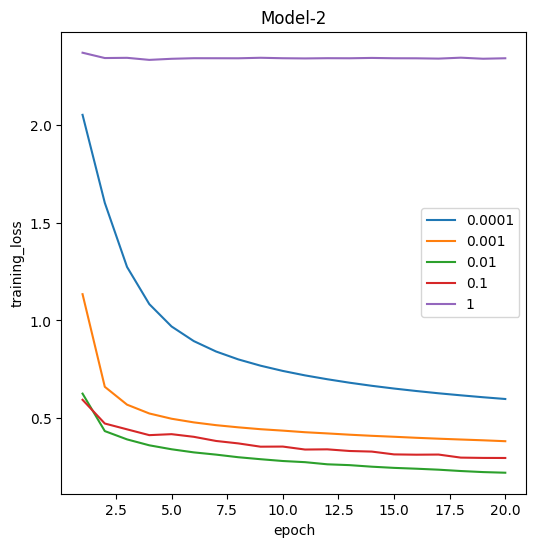

In [47]:
plt.figure(figsize=(6, 6))

for i in range(5):

  plt.plot(np.arange(1, 21), losses1[i], label=lr[i])

plt.xlabel('epoch')
plt.ylabel('training_loss')
plt.title('Model-2')
plt.legend()


In [48]:
losses2 = [[], [], [], [], []]
lr = [0.0001, 0.001, 0.01, 0.1, 1]

for i in range(5):

  model = NeuralNet2().to(device)

  print(f'For Learning Rate = {lr[i]}')
  
  train(model, learning_rate = lr[i], losses_ep = losses2[i])

  print('_______________________________________')

For Learning Rate = 0.0001
epoch 1/20 step 100/938, loss = 2.3171727657318115
epoch 1/20 step 200/938, loss = 2.2859256267547607
epoch 1/20 step 300/938, loss = 2.2727863788604736
epoch 1/20 step 400/938, loss = 2.2815656661987305
epoch 1/20 step 500/938, loss = 2.273744583129883
epoch 1/20 step 600/938, loss = 2.2536187171936035
epoch 1/20 step 700/938, loss = 2.2565324306488037
epoch 1/20 step 800/938, loss = 2.258439064025879
epoch 1/20 step 900/938, loss = 2.2259466648101807
epoch 2/20 step 100/938, loss = 2.186159372329712
epoch 2/20 step 200/938, loss = 2.2244884967803955
epoch 2/20 step 300/938, loss = 2.1686196327209473
epoch 2/20 step 400/938, loss = 2.173839807510376
epoch 2/20 step 500/938, loss = 2.1586389541625977
epoch 2/20 step 600/938, loss = 2.1122336387634277
epoch 2/20 step 700/938, loss = 2.1001827716827393
epoch 2/20 step 800/938, loss = 2.0785317420959473
epoch 2/20 step 900/938, loss = 2.053908109664917
epoch 3/20 step 100/938, loss = 2.0465002059936523
epoch 3/2

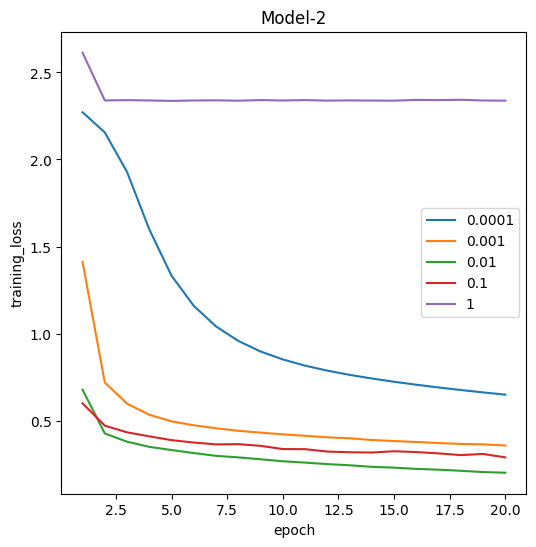

In [49]:
plt.figure(figsize = (6, 6))

for i in range(5):

  plt.plot(np.arange(1, 21), losses2[i], label = lr[i])

plt.xlabel('epoch')
plt.ylabel('training_loss')
plt.title('Model-2')
plt.legend()

In [51]:
losses3 = [[], [], [], [], []]
lr = [0.0001, 0.001, 0.01, 0.1, 1]

for i in range(5):

  model = NeuralNet3().to(device)

  print(f'For Learning Rate = {lr[i]}')
  
  train(model, learning_rate = lr[i], losses_ep = losses3[i])

  print('_______________________________________')

For Learning Rate = 0.0001
epoch 1/20 step 100/938, loss = 2.3022689819335938
epoch 1/20 step 200/938, loss = 2.303469181060791
epoch 1/20 step 300/938, loss = 2.305565357208252
epoch 1/20 step 400/938, loss = 2.307445526123047
epoch 1/20 step 500/938, loss = 2.3003976345062256
epoch 1/20 step 600/938, loss = 2.299513101577759
epoch 1/20 step 700/938, loss = 2.297123908996582
epoch 1/20 step 800/938, loss = 2.2923781871795654
epoch 1/20 step 900/938, loss = 2.287836790084839
epoch 2/20 step 100/938, loss = 2.285101890563965
epoch 2/20 step 200/938, loss = 2.283660888671875
epoch 2/20 step 300/938, loss = 2.286862373352051
epoch 2/20 step 400/938, loss = 2.276965856552124
epoch 2/20 step 500/938, loss = 2.2869622707366943
epoch 2/20 step 600/938, loss = 2.2751636505126953
epoch 2/20 step 700/938, loss = 2.275970458984375
epoch 2/20 step 800/938, loss = 2.276780128479004
epoch 2/20 step 900/938, loss = 2.273655414581299
epoch 3/20 step 100/938, loss = 2.278482437133789
epoch 3/20 step 20

Text(0.5, 1.0, 'Model-3')

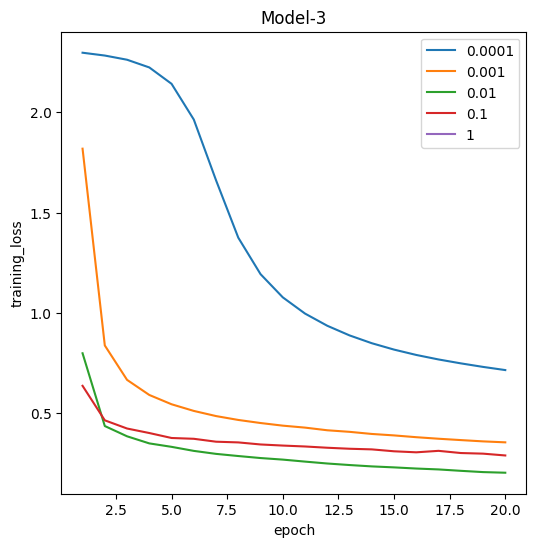

In [52]:
plt.figure(figsize = (6, 6))

for i in range(5):

  plt.plot(np.arange(1, 21), losses3[i], label = lr[i])

plt.xlabel('epoch')
plt.ylabel('training_loss')
plt.legend()
plt.title("Model-3")

In [53]:
# Training with Learning_Rate = 0.01 and different mini batch sizes

In [54]:
batch_sizes = [16, 64, 256, 1024, 2048]
losses = [[], [], [], [], []]
accuracy1 = []

for size in batch_sizes:
  
  print(f'For Mini-Batch size {size}')

  train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = size,
                                           shuffle = True)
  
  test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = size,
                                           shuffle = False)
  
  n_total_steps = len(train_loader)

  model = NeuralNet().to(device)

  train(model, learning_rate = 0.01, losses_ep = losses[i])

  acc = test(model)
  accuracy1.append(acc)

  print('----------------------------------------------')

For Mini-Batch size 16
epoch 1/20 step 100/3750, loss = 0.7887209057807922
epoch 1/20 step 200/3750, loss = 0.7082564234733582
epoch 1/20 step 300/3750, loss = 0.5326684713363647
epoch 1/20 step 400/3750, loss = 0.7043599486351013
epoch 1/20 step 500/3750, loss = 0.5913435220718384
epoch 1/20 step 600/3750, loss = 0.27099329233169556
epoch 1/20 step 700/3750, loss = 0.7833996415138245
epoch 1/20 step 800/3750, loss = 0.5271236300468445
epoch 1/20 step 900/3750, loss = 0.6038333177566528
epoch 1/20 step 1000/3750, loss = 0.403413861989975
epoch 1/20 step 1100/3750, loss = 0.6611204743385315
epoch 1/20 step 1200/3750, loss = 0.15575282275676727
epoch 1/20 step 1300/3750, loss = 0.6972780823707581
epoch 1/20 step 1400/3750, loss = 0.8883776664733887
epoch 1/20 step 1500/3750, loss = 0.2925495505332947
epoch 1/20 step 1600/3750, loss = 0.29040536284446716
epoch 1/20 step 1700/3750, loss = 0.328323632478714
epoch 1/20 step 1800/3750, loss = 0.6901159882545471
epoch 1/20 step 1900/3750, loss

In [55]:
batch_sizes = [16, 64, 256, 1024, 2048]
losses = [[], [], [], [], []]
accuracy2 = []

for size in batch_sizes:
  
  print(f'For Mini-Batch size {size}')

  train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = size,
                                           shuffle = True)
  
  test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = size,
                                           shuffle = False)
  
  n_total_steps = len(train_loader)

  model = NeuralNet2().to(device)

  train(model, learning_rate = 0.01, losses_ep = losses[i])

  acc = test(model)
  accuracy2.append(acc)

  print('----------------------------------------------')

For Mini-Batch size 16
epoch 1/20 step 100/3750, loss = 0.8620169162750244
epoch 1/20 step 200/3750, loss = 0.7027512788772583
epoch 1/20 step 300/3750, loss = 0.6568958163261414
epoch 1/20 step 400/3750, loss = 0.5746782422065735
epoch 1/20 step 500/3750, loss = 0.9335266351699829
epoch 1/20 step 600/3750, loss = 0.34613698720932007
epoch 1/20 step 700/3750, loss = 0.7797558307647705
epoch 1/20 step 800/3750, loss = 0.61778724193573
epoch 1/20 step 900/3750, loss = 0.35421377420425415
epoch 1/20 step 1000/3750, loss = 0.36294683814048767
epoch 1/20 step 1100/3750, loss = 0.2640124559402466
epoch 1/20 step 1200/3750, loss = 0.689473569393158
epoch 1/20 step 1300/3750, loss = 0.6565083861351013
epoch 1/20 step 1400/3750, loss = 0.6327853798866272
epoch 1/20 step 1500/3750, loss = 0.44146040081977844
epoch 1/20 step 1600/3750, loss = 0.4067012071609497
epoch 1/20 step 1700/3750, loss = 0.6267963647842407
epoch 1/20 step 1800/3750, loss = 0.23064124584197998
epoch 1/20 step 1900/3750, los

In [57]:
batch_sizes = [16, 64, 256, 1024, 2048]
losses = [[], [], [], [], []]
accuracy3 = []

for size in batch_sizes:
  
  print(f'For Mini-Batch size {size}')

  train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = size,
                                           shuffle = True)
  
  test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = size,
                                           shuffle = False)
  
  n_total_steps = len(train_loader)

  model = NeuralNet3().to(device)

  train(model, learning_rate = 0.01, losses_ep = losses[i])

  acc = test(model)
  accuracy3.append(acc)

  print('----------------------------------------------')

For Mini-Batch size 16
epoch 1/20 step 100/3750, loss = 1.3786848783493042
epoch 1/20 step 200/3750, loss = 0.8036202788352966
epoch 1/20 step 300/3750, loss = 0.5513556003570557
epoch 1/20 step 400/3750, loss = 1.1542868614196777
epoch 1/20 step 500/3750, loss = 0.6366439461708069
epoch 1/20 step 600/3750, loss = 0.9813681244850159
epoch 1/20 step 700/3750, loss = 1.050023078918457
epoch 1/20 step 800/3750, loss = 0.4236920475959778
epoch 1/20 step 900/3750, loss = 0.45008400082588196
epoch 1/20 step 1000/3750, loss = 0.48189666867256165
epoch 1/20 step 1100/3750, loss = 0.35392525792121887
epoch 1/20 step 1200/3750, loss = 0.2718702554702759
epoch 1/20 step 1300/3750, loss = 0.3709336221218109
epoch 1/20 step 1400/3750, loss = 0.7001579403877258
epoch 1/20 step 1500/3750, loss = 0.6258426904678345
epoch 1/20 step 1600/3750, loss = 1.3306905031204224
epoch 1/20 step 1700/3750, loss = 0.7626861929893494
epoch 1/20 step 1800/3750, loss = 0.7487943172454834
epoch 1/20 step 1900/3750, los

In [64]:
import pandas as pd

In [65]:
accuracy = {'Model-1': accuracy1, 'Model-2': accuracy2, 'Model-3': accuracy3}

df = pd.DataFrame(accuracy, index = ['Batch Size 1', 'Batch Size 2', 'Batch Size 3', 'Batch Size 4', 'Batch Size 5'])

df.T

,Batch Size 1,Batch Size 2,Batch Size 3,Batch Size 4,Batch Size 5
Model-1,87.20,88.57,86.92,83.92,82.14
Model-2,88.77,89.38,87.66,84.43,82.73
Model-3,88.63,88.06,87.53,84.76,81.65


In [77]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = 64,
                                           shuffle = True)
  
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = 64,
                                          shuffle = False)

In [80]:
class NeuralNetb(nn.Module):

  def __init__(self):
        
    super().__init__()

    self.linear_relu_stack = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

  def forward(self, x):

    out = self.linear_relu_stack(x)

    return out

In [81]:
modelb = NeuralNetb().to(device)
lossb = []
train(modelb, learning_rate = 0.01, losses_ep = lossb)

epoch 1/20 step 100/938, loss = 0.7524082064628601
epoch 1/20 step 200/938, loss = 0.6124672889709473
epoch 1/20 step 300/938, loss = 0.4067150354385376
epoch 1/20 step 400/938, loss = 0.477519690990448
epoch 1/20 step 500/938, loss = 0.5623499751091003
epoch 1/20 step 600/938, loss = 0.5294672846794128
epoch 1/20 step 700/938, loss = 0.4685816764831543
epoch 1/20 step 800/938, loss = 0.4613911509513855
epoch 1/20 step 900/938, loss = 0.3564802408218384
epoch 2/20 step 100/938, loss = 0.2871313989162445
epoch 2/20 step 200/938, loss = 0.40752506256103516
epoch 2/20 step 300/938, loss = 0.2981613874435425
epoch 2/20 step 400/938, loss = 0.44807830452919006
epoch 2/20 step 500/938, loss = 0.6383505463600159
epoch 2/20 step 600/938, loss = 0.4210444688796997
epoch 2/20 step 700/938, loss = 0.4399685263633728
epoch 2/20 step 800/938, loss = 0.5051897764205933
epoch 2/20 step 900/938, loss = 0.6089931726455688
epoch 3/20 step 100/938, loss = 0.3458692729473114
epoch 3/20 step 200/938, loss 

In [82]:
accuracyb = test(modelb)

accuracy 88.92%


In [83]:
accuracy1[1]

88.57